In [109]:
import pandas as pd
import numpy as np

In [110]:
def transform(df):
    df['timestamp'], df['customer_no'], df['location'] = df['timestamp;customer_no;location'].str.split(';').str
    df.drop(columns='timestamp;customer_no;location', inplace=True)
    df['customer_no']= pd.to_numeric(df['customer_no'])
    df['timestamp']=pd.to_datetime(df['timestamp'])
    
    df=df.sort_values(['customer_no','timestamp'])
    df['following_location']=df.groupby('customer_no')['location'].shift(-1)
    
    df['time'] =df['timestamp'].dt.time
    df['following_timestamp']=df.groupby('customer_no')['timestamp'].shift(-1)
    df['time_diff']=(pd.to_datetime(df['following_timestamp']) - pd.to_datetime(df['timestamp'])).astype('timedelta64[m]')
    
    df['hour'] =df['timestamp'].dt.hour
    df['day'] =df['timestamp'].dt.day_name()
    df['week'] =df['timestamp'].dt.week
    df['month'] =df['timestamp'].dt.month
    df['year'] =df['timestamp'].dt.year
    
    df['customer_id']=df['customer_no'].astype(str)+'_'+df['day']
    
    df_first=pd.DataFrame()
    df_first['1st_location']=df.groupby('customer_no')['timestamp'].min()
    df_first['first_location']= "First_location"
    df = pd.merge(df, df_first, how='left', left_on=['customer_no','timestamp'], right_on = ['customer_no','1st_location'])
    df.drop(columns='1st_location', inplace=True)
 
    return df

In [111]:
df_mon=transform(pd.read_csv('monday.csv'))
df_tue=transform(pd.read_csv('tuesday.csv'))
df_wed=transform(pd.read_csv('wednesday.csv'))
df_thu=transform(pd.read_csv('thursday.csv'))
df_fri=transform(pd.read_csv('friday.csv'))
df_mon.dtypes

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


timestamp              datetime64[ns]
customer_no                     int64
location                       object
following_location             object
time                           object
following_timestamp    datetime64[ns]
time_diff                     float64
hour                            int64
day                            object
week                            int64
month                           int64
year                            int64
customer_id                    object
first_location                 object
dtype: object

In [112]:
df=df_mon.append(df_tue).append(df_wed).append(df_thu).append(df_fri)
df

,timestamp,customer_no,location,following_location,time,following_timestamp,time_diff,hour,day,week,month,year,customer_id,first_location
0,2019-09-02 07:03:00,1,dairy,checkout,07:03:00,2019-09-02 07:05:00,2.0,7,Monday,36,9,2019,1_Monday,First_location
1,2019-09-02 07:05:00,1,checkout,NaN,07:05:00,NaT,NaN,7,Monday,36,9,2019,1_Monday,NaN
2,2019-09-02 07:03:00,2,dairy,checkout,07:03:00,2019-09-02 07:06:00,3.0,7,Monday,36,9,2019,2_Monday,First_location
3,2019-09-02 07:06:00,2,checkout,NaN,07:06:00,NaT,NaN,7,Monday,36,9,2019,2_Monday,NaN
4,2019-09-02 07:04:00,3,dairy,checkout,07:04:00,2019-09-02 07:06:00,2.0,7,Monday,36,9,2019,3_Monday,First_location
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5120,2019-09-06 21:50:00,1507,checkout,NaN,21:50:00,NaT,NaN,21,Friday,36,9,2019,1507_Friday,NaN
5121,2019-09-06 21:48:00,1508,dairy,checkout,21:48:00,2019-09-06 21:50:00,2.0,21,Friday,36,9,2019,1508_Friday,First_location
5122,2019-09-06 21:50:00,1508,checkout,NaN,21:50:00,NaT,NaN,21,Friday,36,9,2019,1508_Friday,NaN
5123,2019-09-06 21:50:00,1509,drinks,NaN,21:50:00,NaT,NaN,21,Friday,36,9,2019,1509_Friday,First_location


In [113]:
df.describe()

,customer_no,time_diff,hour,week,month,year
count,24877.000000,17432.000000,24877.000000,24877.0,24877.0,24877.0
mean,745.139647,2.665099,14.125417,36.0,9.0,2019.0
std,429.478200,2.436890,4.324691,0.0,0.0,0.0
min,1.000000,1.000000,7.000000,36.0,9.0,2019.0
25%,372.000000,1.000000,10.000000,36.0,9.0,2019.0
50%,747.000000,2.000000,14.000000,36.0,9.0,2019.0
75%,1116.000000,3.000000,18.000000,36.0,9.0,2019.0
max,1535.000000,30.000000,21.000000,36.0,9.0,2019.0


**The total number of customers in each section**

In [114]:
df.groupby(['location'])['customer_no'].count().sort_values(ascending=False)

location
checkout    7417
fruit       5122
dairy       4679
drinks      3905
spices      3754
Name: customer_no, dtype: int64

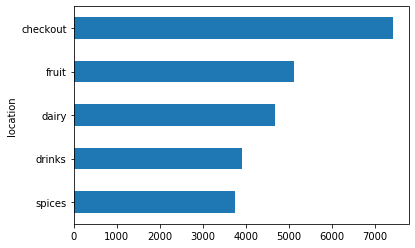

In [115]:
df.groupby(['location'])['customer_no'].count().sort_values().plot(kind='barh')

**The total number of customers in each section over time**

In [116]:
df.groupby(['hour', 'location'])['customer_no'].count().unstack().transpose()

hour,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
location,,,,,,,,,,,,,,,
checkout,454,677,455,427,342,384,514,496,412,518,556,630,755,492,305
dairy,275,455,291,294,210,225,340,319,233,337,360,425,466,298,151
drinks,278,348,231,198,150,188,238,229,190,272,294,361,441,307,180
fruit,299,468,336,270,244,247,389,345,316,353,410,453,507,312,173
spices,238,342,207,242,165,208,273,261,184,262,269,346,389,246,122


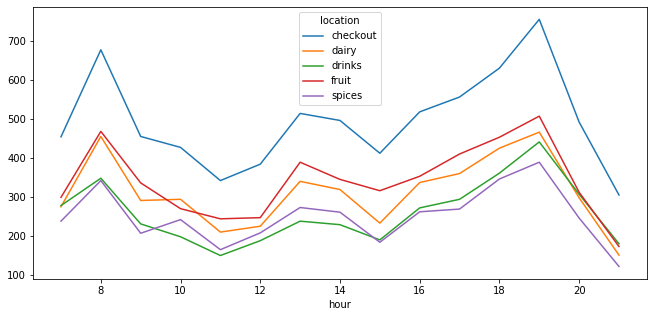

In [117]:
df.groupby(['location', 'hour'])['customer_no'].count().unstack().transpose().plot(figsize=(11,5))

**The number of customers at checkout over time**

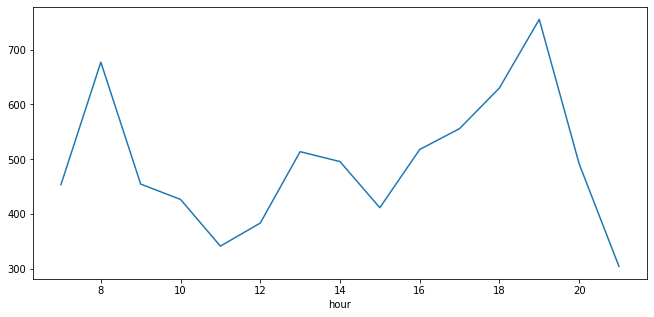

In [118]:
df[df['location']=='checkout'].groupby(['hour'])['customer_no'].count().plot(figsize=(11,5))

**Time each customer spent in the market**

In [119]:
df.groupby(['day','customer_no'])['time_diff'].sum()

day        customer_no
Friday     1               5.0
           2               1.0
           3              11.0
           4               1.0
           5              14.0
                          ... 
Wednesday  1527            3.0
           1528            3.0
           1529            4.0
           1530            3.0
           1531            3.0
Name: time_diff, Length: 7445, dtype: float64

In [120]:
df.groupby(['day','customer_no'])['time_diff'].sum().max()

52.0

In [121]:
df.groupby(['day','customer_no'])['time_diff'].sum().min()

0.0

In [122]:
df.groupby(['day','customer_no'])['time_diff'].sum().mean()

6.240161182001343

**The total number of customers present in the supermarket over time.**

In [123]:
print('Total visitors Mo-Fr:', df['customer_no'].count())

Total visitors Mo-Fr: 24877


In [124]:
df.groupby('hour')['customer_no'].count()

hour
7     1544
8     2290
9     1520
10    1431
11    1111
12    1252
13    1754
14    1650
15    1335
16    1742
17    1889
18    2215
19    2558
20    1655
21     931
Name: customer_no, dtype: int64

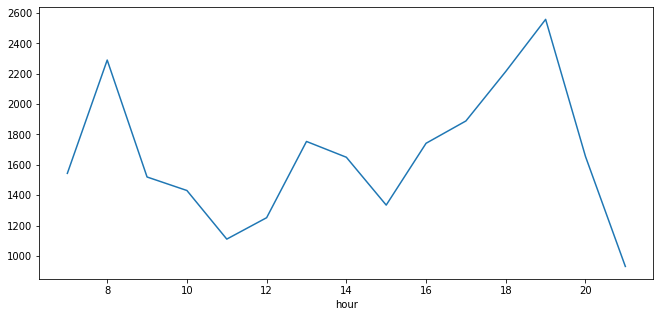

In [125]:
df.groupby('hour')['customer_no'].count().plot(figsize=(11,5))

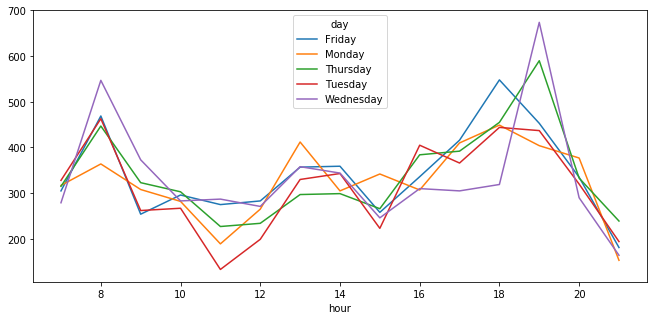

In [126]:
df.groupby(['day', 'hour'])['customer_no'].count().unstack().transpose().plot(figsize=(11,5))

**The distribution of customers of their first visited section versus following sections**

In [127]:
listloc=[]

for i,row in df.iterrows():
    
    loc = row['first_location']
    
    if loc == 'First_location':
        loc2 = 'first_location'
    else:
        loc2 = 'following'
    listloc.append(loc2)

df['first_location']=listloc

# df.groupby('first_location')['customer_no'].count()
df

,timestamp,customer_no,location,following_location,time,following_timestamp,time_diff,hour,day,week,month,year,customer_id,first_location
0,2019-09-02 07:03:00,1,dairy,checkout,07:03:00,2019-09-02 07:05:00,2.0,7,Monday,36,9,2019,1_Monday,first_location
1,2019-09-02 07:05:00,1,checkout,NaN,07:05:00,NaT,NaN,7,Monday,36,9,2019,1_Monday,following
2,2019-09-02 07:03:00,2,dairy,checkout,07:03:00,2019-09-02 07:06:00,3.0,7,Monday,36,9,2019,2_Monday,first_location
3,2019-09-02 07:06:00,2,checkout,NaN,07:06:00,NaT,NaN,7,Monday,36,9,2019,2_Monday,following
4,2019-09-02 07:04:00,3,dairy,checkout,07:04:00,2019-09-02 07:06:00,2.0,7,Monday,36,9,2019,3_Monday,first_location
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5120,2019-09-06 21:50:00,1507,checkout,NaN,21:50:00,NaT,NaN,21,Friday,36,9,2019,1507_Friday,following
5121,2019-09-06 21:48:00,1508,dairy,checkout,21:48:00,2019-09-06 21:50:00,2.0,21,Friday,36,9,2019,1508_Friday,first_location
5122,2019-09-06 21:50:00,1508,checkout,NaN,21:50:00,NaT,NaN,21,Friday,36,9,2019,1508_Friday,following
5123,2019-09-06 21:50:00,1509,drinks,NaN,21:50:00,NaT,NaN,21,Friday,36,9,2019,1509_Friday,first_location


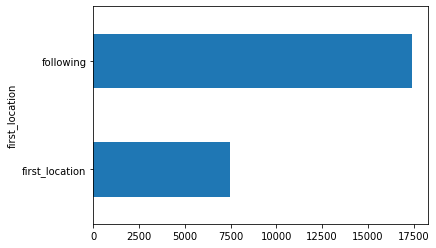

In [128]:
df.groupby('first_location')['first_location'].count().plot(kind='barh')

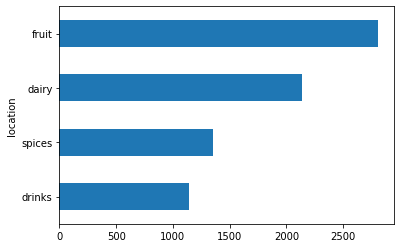

In [129]:
df[df['first_location']=='first_location'].groupby(['location'])['customer_no'].count().sort_values().plot(kind='barh')

In [130]:
# initial state probabilities

initial_state_proba = df[df['first_location']=='first_location'].groupby(['location'])['customer_no'].count() / \
df[df['first_location']=='first_location'].groupby(['location'])['customer_no'].count().sum()
initial_state_proba

location
dairy     0.287576
drinks    0.153526
fruit     0.377435
spices    0.181464
Name: customer_no, dtype: float64

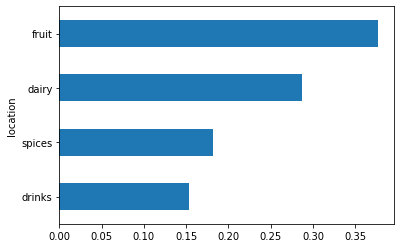

In [131]:
# Initial state distribution in %
initial_state_proba.sort_values().plot(kind='barh')

**Estimation of total revenue for a customer value**  
**Which is the most profitable section?**

In [132]:
# revenue per minute
# fruit = 4
# spices = 3
# dairy = 5
# drinks = 6

In [133]:
listrev=[]

for i,row in df.iterrows():
    loc = row['location']
    if loc == 'fruit':
        rev = 4
    elif loc == 'spices':
        rev = 3
    elif loc == 'dairy':
        rev = 5
    elif loc == 'drinks':
        rev = 6
    else:
        rev = 0
    listrev.append(rev)

df['revenue_per_min']=listrev

In [134]:
df['revenue'] = df['revenue_per_min']*df['time_diff']

In [135]:
df['revenue'].dtypes

dtype('float64')

In [136]:
df.groupby('location')['revenue'].sum()

location
checkout        0.0
dairy       88800.0
drinks      58344.0
fruit       50804.0
spices      18819.0
Name: revenue, dtype: float64

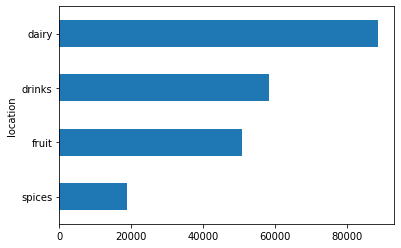

In [137]:
df[df['location']!='checkout'].groupby('location')['revenue'].sum().sort_values().plot(kind='barh')

**Transition Probabilities**  


In [138]:
df_p=df.dropna(subset=['following_location'])
df_p

,timestamp,customer_no,location,following_location,time,following_timestamp,time_diff,hour,day,week,month,year,customer_id,first_location,revenue_per_min,revenue
0,2019-09-02 07:03:00,1,dairy,checkout,07:03:00,2019-09-02 07:05:00,2.0,7,Monday,36,9,2019,1_Monday,first_location,5,10.0
2,2019-09-02 07:03:00,2,dairy,checkout,07:03:00,2019-09-02 07:06:00,3.0,7,Monday,36,9,2019,2_Monday,first_location,5,15.0
4,2019-09-02 07:04:00,3,dairy,checkout,07:04:00,2019-09-02 07:06:00,2.0,7,Monday,36,9,2019,3_Monday,first_location,5,10.0
6,2019-09-02 07:04:00,4,dairy,checkout,07:04:00,2019-09-02 07:08:00,4.0,7,Monday,36,9,2019,4_Monday,first_location,5,20.0
8,2019-09-02 07:04:00,5,spices,checkout,07:04:00,2019-09-02 07:05:00,1.0,7,Monday,36,9,2019,5_Monday,first_location,3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,2019-09-06 21:47:00,1503,dairy,drinks,21:47:00,2019-09-06 21:49:00,2.0,21,Friday,36,9,2019,1503_Friday,first_location,5,10.0
5114,2019-09-06 21:47:00,1504,fruit,checkout,21:47:00,2019-09-06 21:48:00,1.0,21,Friday,36,9,2019,1504_Friday,first_location,4,4.0
5116,2019-09-06 21:48:00,1505,fruit,dairy,21:48:00,2019-09-06 21:49:00,1.0,21,Friday,36,9,2019,1505_Friday,first_location,4,4.0
5119,2019-09-06 21:48:00,1507,dairy,checkout,21:48:00,2019-09-06 21:50:00,2.0,21,Friday,36,9,2019,1507_Friday,first_location,5,10.0


**Transition Probability Matrix**

In [139]:
P = pd.crosstab(df_p['location'], df_p['following_location'], normalize=0)
P

following_location,checkout,dairy,drinks,fruit,spices
location,,,,,
dairy,0.391211,0.000000,0.223151,0.189925,0.195713
drinks,0.537023,0.027159,0.000000,0.219062,0.216756
fruit,0.499511,0.238319,0.136266,0.000000,0.125904
spices,0.251000,0.323553,0.273140,0.152307,0.000000


In [140]:
#!pip install pygraphviz
#!conda install graphviz pygraphviz -c alubbock
#!conda install -c conda-forge python-graphviz

In [141]:
# import pygraphviz as pgv

# states = ['checkout', 'dairy', 'drinks', 'fruit', 'spices']
# G = pgv.AGraph(directed=True)
# for state_from in states:
#     for state_to in states:
#         G.add_edge(state_from, state_to, label=np.round(P.loc[state_from, state_to],2))

# G.draw('transition.png', prog='dot')

In [142]:
state_space = ['checkout', 'dairy', 'drinks', 'fruit', 'spices']
initial_state = np.array([0, 0, 1, 0])
transition_probabilites = P.values
probabilities_tomorrow = initial_state.dot(P)
probabilities_tomorrow

array([0.49951124, 0.23831867, 0.13626588, 0.        , 0.1259042 ])

**Monte-Carlo-Markov-Chain generator function:  
randomly generates the sequence of locations a customer visits**

In [143]:
import random

def customer(prob_matrix, initial_state):
    
    for i in range(1,1000):  
        while True:
            prob=prob_matrix.loc[initial_state]
            new_state=np.random.choice(prob.index, p = prob.values)
            yield print(f"A customer starts at {initial_state} section and moves to {new_state}")

In [144]:
prob_matrix = P
initial_state = 'fruit'
move_generator = customer(prob_matrix, initial_state)
next(move_generator)

A customer starts at fruit section and moves to spices


In [294]:
# initial state probabilities

initial_state_proba = df[df['first_location']=='first_location'].groupby(['location'])['customer_no'].count() / \
df[df['first_location']=='first_location'].groupby(['location'])['customer_no'].count().sum()
initial_state_proba

location
dairy     0.287576
drinks    0.153526
fruit     0.377435
spices    0.181464
Name: customer_no, dtype: float64

In [145]:
P

following_location,checkout,dairy,drinks,fruit,spices
location,,,,,
dairy,0.391211,0.000000,0.223151,0.189925,0.195713
drinks,0.537023,0.027159,0.000000,0.219062,0.216756
fruit,0.499511,0.238319,0.136266,0.000000,0.125904
spices,0.251000,0.323553,0.273140,0.152307,0.000000


**Simulation**  
**Monte Carlo / Markov Chains**

In [244]:
class Customer:
    '''
    The class Customer shows customer movements in the supermarket
    '''
    def __init__(self, initial_state_proba, prob_matrix, state_space):       
        
        # state space for initial section (excl. checkout)
        self.state_space = [x for x in state_space if x != 'checkout']
        
        # probabilities for the first location
        self.initial_state_proba = initial_state_proba
        
        # simulation of initial section based on 'initial_state_proba' (probabilities of initial section to be taken)
        self.initial_section = np.random.choice(self.state_space, p = self.initial_state_proba)     

        # probability matrix for further moves
        self.prob_matrix = prob_matrix
        
        # list of customer movements
        self.movements=[]
        
        
    def move(self):
        '''Defines the movement of the Customer'''
        while True:
            
            # extracting probabilities for next moves for above chosen initial section('initial_section') from a probability matrix
            new_prob=self.prob_matrix.loc[self.initial_section]

            # simulation of move to the next section based on simulated 'initial_section'
            new_state=np.random.choice(new_prob.index, p = new_prob.values)

            # adding the next supermarket section to a list
            self.movements.append(new_state)

            #if customer move is "checkout" - stop
            if new_state == 'checkout':
                break
                
        return self.movements

            
    def __repr__(self):
        return f'''\033[1mA customer starts at section:\n{self.initial_section}\nand follows to:\n{self.movements} \033[0m'''


In [338]:
state_space=['checkout', 'dairy', 'drinks', 'fruit', 'spices']
prob_matrix = P
initial_state_proba = initial_state_proba

m = Customer(initial_state_proba, prob_matrix, state_space)
m.move()
m

A customer starts at section:
spices
and follows to:
['dairy', 'checkout'] 

In [293]:
simulated_customers = []
customer_id = []
for i in range(1,100):
    m = Customer(initial_state_proba, prob_matrix, state_space)
    m.move()
    simulated_customers.append([m.initial_section] + m.movements)
    customer_id.append('Customer'+'_'+str(i))
z = list(zip(customer_id, simulated_customers))
z

[('Customer_1', ['drinks', 'spices', 'checkout']),
 ('Customer_2', ['dairy', 'checkout']),
 ('Customer_3', ['drinks', 'fruit', 'spices', 'fruit', 'checkout']),
 ('Customer_4', ['fruit', 'drinks', 'checkout']),
 ('Customer_5', ['fruit', 'dairy', 'checkout']),
 ('Customer_6', ['dairy', 'fruit', 'drinks', 'fruit', 'fruit', 'checkout']),
 ('Customer_7', ['fruit', 'checkout']),
 ('Customer_8', ['drinks', 'fruit', 'checkout']),
 ('Customer_9', ['drinks', 'checkout']),
 ('Customer_10', ['fruit', 'dairy', 'checkout']),
 ('Customer_11', ['spices', 'checkout']),
 ('Customer_12', ['dairy', 'drinks', 'drinks', 'checkout']),
 ('Customer_13', ['fruit', 'checkout']),
 ('Customer_14', ['fruit', 'spices', 'checkout']),
 ('Customer_15', ['fruit', 'checkout']),
 ('Customer_16', ['dairy', 'spices', 'fruit', 'checkout']),
 ('Customer_17', ['fruit', 'checkout']),
 ('Customer_18', ['fruit', 'dairy', 'checkout']),
 ('Customer_19', ['dairy', 'fruit', 'spices', 'checkout']),
 ('Customer_20', ['dairy', 'checkout